<a href="https://colab.research.google.com/github/Shashank-u803/Machine-Learning-Lab/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Lab 2: Demonstrate various data pre-processing techniques for a given dataset



Load the California Housing dataset.

• https://github.com/ageron/handson-
ml/blob/master/datasets/housing/housing.csv

• Display the first 10 rows and data types of all attributes.


• Compute basic statistics (mean, median, std, min, max) for numeric
attributes.


• Examine the distribution of the target variable (median_house_value)
using a histogram and box plot.


• Identify any missing data values and list the percentage of missing
values per column.

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


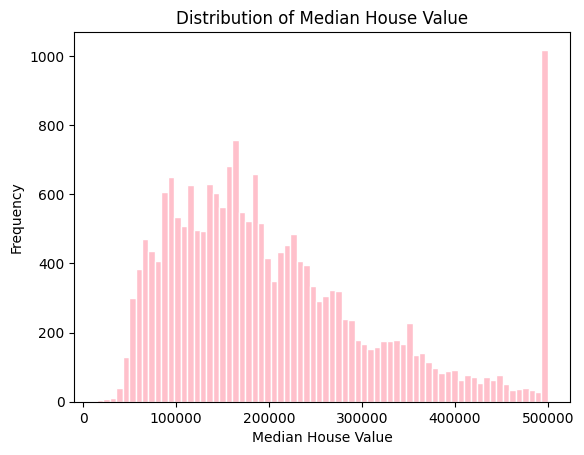

In [8]:
import matplotlib.pyplot as plt

plt.hist(df["median_house_value"],bins=70,color='pink',edgecolor='white')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

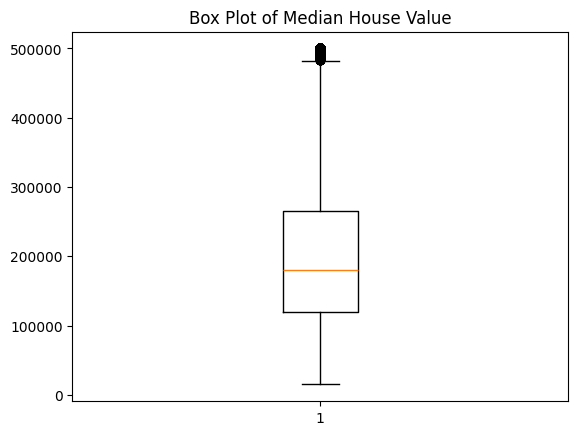

In [12]:
plt.boxplot(df["median_house_value"])
plt.title("Box Plot of Median House Value")
plt.show()


In [14]:
missing = df.isnull().sum()
missing_percent = missing/len(df)*100
df_missing = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
df_missing

,Missing Values,Percentage
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


• Handle missing values in total_bedrooms using an appropriate
imputation strategy and justify your choice.


• Encode the categorical attribute ocean_proximity using one-hot
encoding.


• Perform feature scaling (MinMax scaler) on all numeric features.


• minmax_scaler = MinMaxScaler(feature_range=(0, 1)


• Split the dataset into training (80%) and test (20%) sets using
stratified sampling on the median_income attribute.


• Construct the correlation matrix for all numerical attributes in the
California Housing dataset.

• Visualize the correlation matrix using a heatmap and interpret the
results.

In [21]:
median_value = df['total_bedrooms'].median()

print("Before: No. of nulls ->", df['total_bedrooms'].isnull().sum())

df['total_bedrooms'] = df['total_bedrooms'].fillna(median_value)
print(df['total_bedrooms'])
print("After: No. of nulls ->", df['total_bedrooms'].isnull().sum())

Before: No. of nulls -> 0
0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64
After: No. of nulls -> 0


In [27]:
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'])
    print("Encoding applied.")
else:
    print("Already encoded.")
df

Already encoded.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713


In [31]:
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=[1, 2, 3, 4, 5],
    include_lowest=True
)

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df["income_cat"]):
    train_set = df.loc[train_idx]
    test_set = df.loc[test_idx]
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [35]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,0.017966,-0.006158,-0.004322,-0.019667,0.000557
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.017966,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


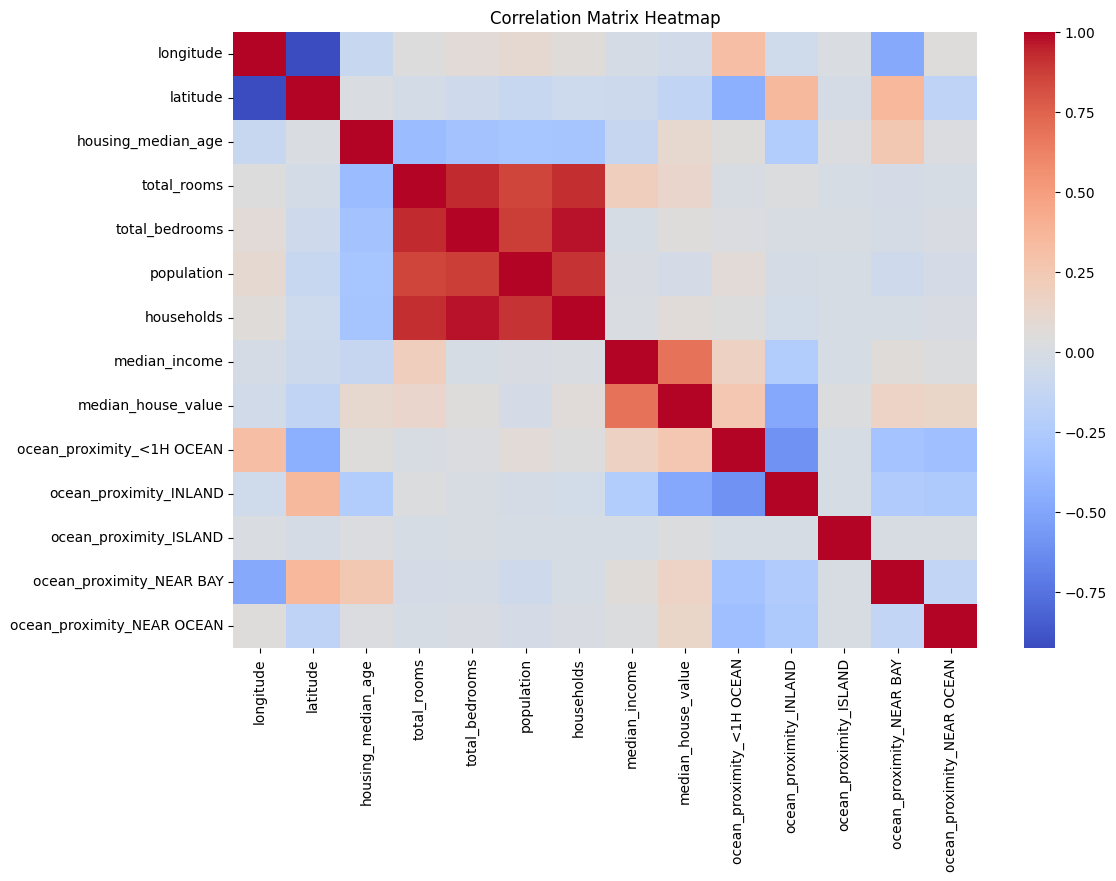

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

• Plot a scatter diagram between median_income and median_house_value.


a) What trend do you observe from the scatter plot?


b) Does the relationship appear linear or non-linear?


c) Identify any visible outliers or clusters.

• Divide the dataset into 80% training and 20% testing sets using random
sampling.

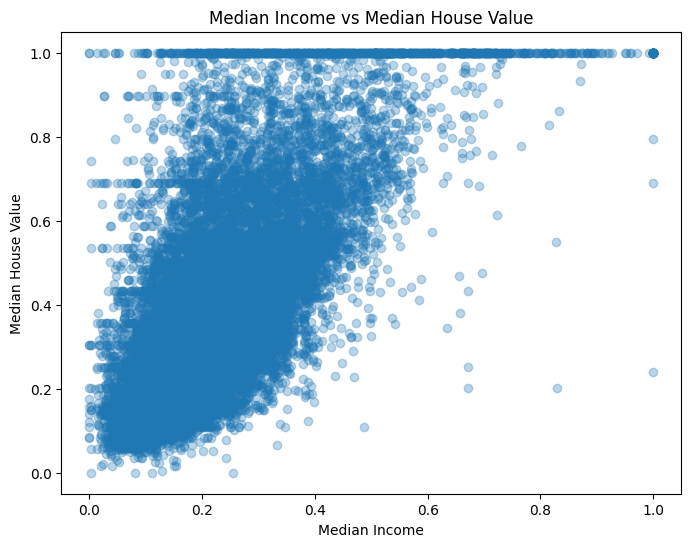

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3)

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")

plt.show()

In [39]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    df,
    test_size=0.2,
    random_state=42
)

print("Training set size:", train_set.shape)
print("Testing set size:", test_set.shape)
print("Train %:", len(train_set)/len(df)*100)
print("Test %:", len(test_set)/len(df)*100)

Training set size: (16512, 15)
Testing set size: (4128, 15)
Train %: 80.0
Test %: 20.0


Identify:

• The top three features most positively correlated with
median_house_value


• The most negatively correlated feature

• Apply Standard Scaling to all numerical features in the dataset.

• scaler = StandardScaler()

• Train the Linear Regression using the training data.


• Find the Root Mean Squared Error (RMSE)


• Mean Absolute Error (MAE)


• R2 Score and display

In [41]:
corr_matrix = df.corr(numeric_only=True)
corr_with_target = corr_matrix["median_house_value"].sort_values(ascending=False)
print(corr_with_target)
top_positive = corr_with_target.drop("median_house_value").head(3)
print("\nTop 3 positively correlated features:\n", top_positive)
most_negative = corr_with_target.tail(1)
print("\nMost negatively correlated feature:\n", most_negative)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

Top 3 positively correlated features:
 median_income                0.688075
ocean_proximity_<1H OCEAN    0.256617
ocean_proximity_NEAR BAY     0.160284
Name: median_house_value, dtype: float64

Most negatively correlated feature:
 ocean_proximity_INLAND   -0.484859
Name: median_house_value, dtype: float64


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
X = train_set.drop("median_house_value", axis=1)
y = train_set["median_house_value"]

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [44]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"]

predictions = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 0.1444611891102126


In [46]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("MAE:", mae)

MAE: 0.10446732774043758


In [47]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.6253872368984065
